# I/ Data Cleaning

Since we have done the webscraping directly on the Airbnb website, the data needs to be cleaned in order to have exploitable features for the model.

In [31]:
#Import of necessary libraries to clean the database
import pandas as pd
import numpy as np


In [32]:
#Following the webscraping, we now have four different databases of the Airbnb website : one for each month between June
#and September for one week-end around the area of Como.
df = pd.read_csv("june_emp.csv")
df1 = pd.read_csv("july_emp.csv")
df2 = pd.read_csv("august_emp.csv")
df3 = pd.read_csv("sept_emp.csv")

#We then merge all databases to have one big dataframe
df_entier = pd.concat([df,df1,df2,df3], ignore_index=True)

df_entier = df_entier.rename(columns = {"Prix par nuit":"price_per_night"})
df_entier = df_entier.rename(columns = {"Conditions annulation":"refundables"})


After having imported all of our data into a single dataframe, we can start the cleaning :
    -the "price_per_night" column includes whitespaces between thousands and hundreds, which is going to distort prices if not changed
    -We observe a similar issue for the 'sdb' or 'lit' columns : they, in some minor cases, take incoherent values due to shift in the column. Since it affects only around five rows, we decided to delete them.
    - Part of the information in the "amenities" column specifies amenities NOT available for the listing, creating a bias when looking for specific key words later on. to facilitate future extraction, we remove the "not available" part

In [ ]:
# Deleting the unnecessary space in the "price_per_night" column
df_entier["price_per_night"] = df_entier["price_per_night"].str.replace(" ","")

#Deleting incoherent values for the "sdb" and "lit" columns
df_entier = df_entier[df_entier["sdb"].str.contains("Membre") == False]
df_entier = df_entier[df_entier["lit"].str.contains("Membre") == False]

#Deleting the "not available" part of each observation of the "amenities" column
df_entier['amenities'] = df_entier['amenities'].apply(lambda x: x.split('Non inclus')[0])

In [33]:
#Here, we decide to work on the price column of our database. Firstly, we have decided to only keep the first five
#characters of the column since, after the extraction, the remaining of the column was only a repetition of the part we 
#chose to keep
df_entier['price_per_night'] = df_entier['price_per_night'].str[:5]

#Then, we have an issue. Indeed, following the webscrapping of the website directly, the values inside what should be
#numerical values is a string : it's not good because it's not usable automatically in our future model. Our idea was that,
#since the thing that really matters in this "numerical columns" was the number, we decided to use the regex library to
#only retrieve the number and change it into a float with the following instruction. This new information was then moved
#into a new column with a more suitable name.

price_regex = '\d+'
import re
df_entier['price_per_night'].apply(lambda x: re.findall(price_regex, x))
df_entier['Prix par nuit'] = df_entier['price_per_night'].apply(lambda x: re.findall(price_regex, x)).str[0].astype(float)

#Once it was working for the price column, we decided to use it for others columns that had the same issue such as the
#number of travelers columns...
voyageurs_num = '\d+'
df_entier['voyageurs'].apply(lambda x: re.findall(voyageurs_num, x))
df_entier['Nombre de voyageurs'] = df_entier['voyageurs'].apply(lambda x: re.findall(voyageurs_num, x)).str[0].astype(float)

chambres_num = '\d+'
df_entier['chambres'].apply(lambda x: re.findall(chambres_num, x))
df_entier['Nombre de chambres'] = df_entier['chambres'].apply(lambda x: re.findall(chambres_num, x)).str[0].astype(float)

lits_num = '\d+'
df_entier['lit'].apply(lambda x: re.findall(lits_num, x))
df_entier['Nombre de lits'] = df_entier['lit'].apply(lambda x: re.findall(lits_num, x)).str[0].astype(float)

sdb_num = '\d+'
df_entier['sdb'].apply(lambda x: re.findall(sdb_num, x))
df_entier['Nombre de salles de bains'] = df_entier['sdb'].apply(lambda x: re.findall(sdb_num, x)).str[0].astype(float)


In [34]:
#Now, we decided to work on the column amenities. This column contains all the specific characteristics of each house in 
#our database. The easiest way we find to extract all of this information was to create a new column for each of the 
#characteristic that existed in this column. To do that, we used the instruction str.contains that allow us to take a
#specific part of the colum.

df_entier["Vue sur le jardin"] = df_entier["amenities"].str.contains("Vue sur le jardin")
df_entier["Vue sur la vallée"] = df_entier["amenities"].str.contains("Vue sur la vall")
df_entier["Vue sur la montagne"] = df_entier["amenities"].str.contains("Vue sur la montagne")
df_entier["Baignoire"] = df_entier["amenities"].str.contains("Baignoire")
df_entier["Sèche-cheveux"] = df_entier["amenities"].str.contains("cheveux")
df_entier["Bidet"] = df_entier["amenities"].str.contains("Bidet")
df_entier["Eau chaude"] = df_entier["amenities"].str.contains("Eau chaude")
#df1["Produits de nettoyage"] = df1["amenities"].str.contains("nettoyages")
df_entier["Lave-linge"] = df_entier["amenities"].str.contains("Lave-linge")
df_entier["Equipements de base"] = df_entier["amenities"].str.contains("de base")
df_entier["Cintres"] = df_entier["amenities"].str.contains("Cintres")
df_entier["Draps"] = df_entier["amenities"].str.contains("Draps")
df_entier["Lave-linge"] = df_entier["amenities"].str.contains("Lave-linge")
df_entier["Oreillers"] = df_entier["amenities"].str.contains("Oreillers")
df_entier["Fer à repasser"] = df_entier["amenities"].str.contains("repasser")
df_entier["Armoire"] = df_entier["amenities"].str.contains("armoire")
df_entier["TV"] = df_entier["amenities"].str.contains("TV")
df_entier["Livres"] = df_entier["amenities"].str.contains("Livres")
df_entier["Ventilateurs"] = df_entier["amenities"].str.contains("Ventilateurs")
df_entier["Chauffage"] = df_entier["amenities"].str.contains("Chauffage")
df_entier["Wifi"] = df_entier["amenities"].str.contains("Wifi")
df_entier["Cuisine"] = df_entier["amenities"].str.contains("Cuisine")
df_entier["Four"] = df_entier["amenities"].str.contains("Four")
df_entier["Vaisselle et couverts"] = df_entier["amenities"].str.contains("Vaisselle et couverts")
df_entier["Jardin privé"] = df_entier["amenities"].str.contains("Jardin")
#df1["Congélateur"] = df1["amenities"].str.contains("lateur")
df_entier["Garage résidentiel"] = df_entier["amenities"].str.contains("Garage")
df_entier["Parking gratuit"] = df_entier["amenities"].str.contains("Parking")
df_entier["Ascenseur"] = df_entier["amenities"].str.contains("Ascenseur")
df_entier["Climatisation"] = df_entier["amenities"].str.contains("Climatisation")
df_entier["Piscine"] = df_entier["amenities"].str.contains("Piscine")
df_entier["Vue sur le lac"] = df_entier["amenities"].str.contains("Vue sur le lac")
#df1["Vue sur la ville"] = df1["amenities"].str.contains("Vue sur la ville")
df_entier["Vue sur la baie"] = df_entier["amenities"].str.contains("Vue sur la baie")




In [35]:
#Then we have to create an homogeneous column for location
df_entier["Localisation"] = df_entier["Localisation"].str.replace("Lombardie","Lombardia")
df_entier["Localisation"] = df_entier["Localisation"].str.replace("Provincia","Province")
df_entier["Localisation"] = df_entier["Localisation"].str.replace("di","of")
df_entier["Localisation"] = df_entier["Localisation"].str.replace("gravedona ed uniti ","gravedona ed uniti")
df_entier['Localisation2'] = df_entier['Localisation'].str.extract('(.+?),') #on extrait seulement les noms de ville
df_entier['Localisation2'] = df_entier['Localisation2'].str.lower()#on met tout en lowercase
df_entier["Localisation2"] = df_entier["Localisation2"].str.replace("gravedona ed uniti ","gravedona ed uniti")
df_entier["Localisation2"] = df_entier["Localisation2"].str.replace("gravedona ed uniti","gravedona")
df_entier["Localisation2"] = df_entier["Localisation2"].str.replace("bellagio -civenna","bellagio")

In [36]:
#Then, we have to remove trailing whitspaces for each location
    
df_entier['Localisation2'] = [item.rstrip() for item in df_entier['Localisation2']]

In [37]:
#Once the extraction of all of the amenities was done, our next issue was that these variables were categorical variables 
#which means that we couldn't use them in our model in this shape. We had then to transform them using one hot encoding.

data = pd.get_dummies(df_entier, columns = ['Vue sur le jardin',
                                     'Vue sur la vallée',
                                     'Vue sur la montagne',
                                     'Baignoire',
                                     'Sèche-cheveux',
                                     'Bidet',
                                     'Eau chaude',
                                     'Lave-linge',
                                     'Equipements de base',
                                     'Cintres',
                                     'Draps',
                                     'Oreillers',
                                     'Fer à repasser',
                                     'Armoire',
                                     'TV',
                                     'Livres',
                                     'Ventilateurs',
                                     'Chauffage',
                                     'Wifi',
                                     'Cuisine',
                                     'Four',
                                     'Vaisselle et couverts',
                                     'Jardin privé',
                                     'Garage résidentiel',
                                     'Parking gratuit',
                                     'Ascenseur',
                                     'Climatisation',
                                     'Piscine',
                                     'Vue sur le lac',
                                     'Vue sur la baie'
                                     
                                    ], drop_first = True)


In [38]:
#Since we created new variables that contains the essential information of the database, we don't need the original 
#columns in our database.
data.drop(columns=['Unnamed: 0',
                   'price_per_night',
                   'refundables',
                   'listing_ratings',
                   'lang_responses',
                   'house_rules',
                   'amenities',
                   'voyageurs',
                   'chambres',
                   'lit',
                   'sdb',
                   'com',
                   'superhote',
                   ], inplace = True)



## Treatment of duplicated data

In [39]:
#Now, it's time to handle duplicates in our database : we delete them using the "drop_duplicates" instruction.
data.drop_duplicates(inplace=True, keep='last')


## Treatment of outliers

In [40]:
#We create a function that finds and drops outliers
def find_drop_outliers(col, data):
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    IQR = q3 - q1
    borne_inf = q1 - 1.5 * IQR
    borne_sup = q3 + 1.5 * IQR
    data = data[data[col] < borne_sup]
    data = data[data[col] > borne_inf]

In [41]:
find_drop_outliers("Prix par nuit",data)


# II/ Feature Engineering

### 1) Creation of a seasonality dependent feature

In [42]:
#Now, we have decided to create a variable representative of the season. Our idea for that is that we divide our database
#in three groups. Based on the average price for each month, we decided that to separate data from june and september, data 
#from july and data from august. Indeed, this choice was made because prices seem to increase following the period.
data.loc[data['date'].str.contains('juin') | data['date'].str.contains('sept'), 'Saison'] = 0
data.loc[data['date'].str.contains('juil'), 'Saison'] = 1
data.loc[data['date'].str.contains('août'), 'Saison'] = 2

### 2) Creation of a location score feature

The idea here is that, based on our data, we will be trying to create a feature that gives a score based on the location
of the house.Location plays an important role in the price characterization. We therefore decide to base our score on three variables. For each city surrounding Como, we create an average of the location's ratings. We also use the average price per location, and finally, using information available online, we determine the distance of each city to our epicenter: Como.


In [43]:
#After having "cleaned" our "Localisation" column by harmonizing city names, we have 121 unique values
b = df_entier['Localisation2'].unique()
b.sort()
len(b)

121

In [44]:
#Let's start by gathering all cities that only appear once in the dataframe
#Counting unique values
vc = (df_entier.Localisation2.value_counts()).to_frame()
vc = vc.reset_index()
vc

,index,Localisation2
0,côme,484
1,blevio,50
2,perledo,42
3,bellagio,37
4,lezzeno,35
...,...,...
116,albese con cassano,1
117,vignola,1
118,suello,1
119,lurago marinone,1


In [45]:
# We select a list of all the cities that appear once 
bla= vc.loc[vc['Localisation2'] == 1]
city_to_group = bla['index'].to_list()
city_to_group

['magreglio',
 'lipomo',
 'beregazzo',
 'longone al segrino',
 'pusiano',
 'galbiate',
 'vendrogno',
 'pianello del lario (co)',
 'primaluna',
 'palanzo',
 'onno - oliveto lario',
 'erba',
 'luisago',
 'malgrate',
 'bellagio (località civenna)',
 'imbersago',
 'gera lario',
 ' lecco',
 'tremezzina',
 'breglia',
 'la punta',
 'olginate',
 'colonno',
 'montemezzo (co)',
 'cima',
 'bene lario',
 'san mamete',
 'margno',
 'giussano',
 'plesio frazione barna',
 'ramponio',
 'tavernerio',
 'sueglio',
 'albese con cassano',
 'vignola',
 'suello',
 'lurago marinone',
 'cantù']

In [46]:
#We replace all the cities in that list with the tag "others", in the "Localisation2" column of our df
for x in city_to_group:
    df_entier['Localisation2'] = df_entier['Localisation2'].replace([x],'others')

In [47]:
#We now have a lower amount of unique values
a =df_entier['Localisation2'].unique()
len(a)

84

In [48]:
#adding the "Prix par nuit" column to our df_entier dataframe, since it is exploitable and we'll be able to reuse it
df_entier.rename(columns={'Prix par nuit': 'Price per night'
                   },
          inplace=True, errors='raise')
df_entier = df_entier.join(data["Prix par nuit"])

df_entier.head()

,Unnamed: 0,listing_ratings,lang_responses,house_rules,amenities,Localisation,price_per_night,refundables,Emplacement,name,...,Jardin privé,Garage résidentiel,Parking gratuit,Ascenseur,Climatisation,Piscine,Vue sur le lac,Vue sur la baie,Localisation2,Prix par nuit
0,0,"4,7",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 16:00Départ...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Perledo, Lombarofa, Italie",27 €,Conditions d'annulationAnnulation gratuite ava...,"Emplacement4,6",Chambre privée dans : logement ⸱ Chez Matteo,...,False,False,True,False,False,False,False,False,perledo,27.0
1,1,"4,9",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : 15:00 - 17:00Dépa...,"{""amenity_Vues panoramiques"": [""Vue panoramiqu...","Abbaofa Lariana, Lombarofa, Italie",90 €,Conditions d'annulationSi vous annulez avant l...,"Emplacement4,8",Logement entier : appartement en résidence ⸱ C...,...,True,False,True,False,False,False,True,False,abbaofa lariana,90.0
2,2,"4,5",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 12:00Départ...,"{""amenity_Salle de bain"": [""Shampooing"", ""Savo...","Tremezzo, Lombarofa, Italie",50 €,Conditions d'annulationSi vous annulez avant l...,"Emplacement4,6",Logement entier : logement ⸱ Chez Alex,...,False,False,False,False,False,False,False,False,tremezzo,50.0
3,3,"4,5",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 16:00Départ...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Moltrasio, Lombarofa, Italie",190 €,Conditions d'annulationAnnulation gratuite ava...,"Emplacement4,7",Logement entier : appartement ⸱ Chez Riccardo,...,False,False,True,True,False,False,False,False,moltrasio,190.0
4,4,"4,7",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 14:00Départ...,"{""amenity_Vues panoramiques"": [""Vue sur la mon...","Vercana, Lombarofa, Italie",85 €,Conditions d'annulationSi vous annulez avant l...,"Emplacement4,7",Logement entier : appartement ⸱ Chez Roberto,...,False,False,True,False,False,False,True,False,vercana,85.0


In [49]:
#Using the groupby pandas extension to get each location's average price per night
total_location= df_entier.groupby(["Localisation2"]).agg({"Prix par nuit":"mean"})
total_location

,Prix par nuit
Localisation2,
abbaofa lariana,85.000000
acquaseria,82.666667
alserio,63.333333
argegno,242.750000
azzano,140.000000
...,...
vercana,170.250000
vertemate con minoprio,21.333333
vestreno,59.000000


In [50]:
#Importing the distance_to_como csv, containing each city's distance to our epicenter, Como

distance_to_como = pd.read_csv("distance_to_como.csv")
distance_to_como.head()

,City,Distance in km
0,abbaofa lariana,37.9
1,argegno,20.8
2,azzano,83.3
3,bellagio,36.9
4,bellano,56.6


In [51]:
#Renaming the distance_to_como's City column to Localisation2

distance_to_como.rename(columns={'City': 'Localisation2'},
          inplace=True, errors='raise')


In [52]:
#Joining the total_location dataframe to the distance_to_como one
total_location = total_location.reset_index()

total_location = total_location.join(distance_to_como.set_index('Localisation2'), on='Localisation2')

In [53]:
#We're slowly collecting all the needed variables to create our final score in the total_location dataframe
total_location

,Localisation2,Prix par nuit,Distance in km
0,abbaofa lariana,85.000000,37.9
1,acquaseria,82.666667,39.9
2,alserio,63.333333,12.6
3,argegno,242.750000,20.8
4,azzano,140.000000,83.3
...,...,...,...
79,vercana,170.250000,57.4
80,vertemate con minoprio,21.333333,12.5
81,vestreno,59.000000,64.3
82,villa guarofa,239.000000,8.8


In [54]:
# Cleaning the "Emplacement" column
df_entier['Emplacement'] = df_entier['Emplacement'].str.replace('Emplacement', '')
df_entier['Emplacement'] = df_entier['Emplacement'].str.replace(',', '.')
df_entier['Emplacement'] = df_entier['Emplacement'].str.replace(' ', '')

In [55]:
# Converting Emplacement values to float (taking into consideration "empty" values)
df_entier['Emplacement'] = pd.to_numeric(df_entier['Emplacement'], errors='coerce')


In [56]:
df_entier

,Unnamed: 0,listing_ratings,lang_responses,house_rules,amenities,Localisation,price_per_night,refundables,Emplacement,name,...,Jardin privé,Garage résidentiel,Parking gratuit,Ascenseur,Climatisation,Piscine,Vue sur le lac,Vue sur la baie,Localisation2,Prix par nuit
0,0,"4,7",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 16:00Départ...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Perledo, Lombarofa, Italie",27 €,Conditions d'annulationAnnulation gratuite ava...,4.6,Chambre privée dans : logement ⸱ Chez Matteo,...,False,False,True,False,False,False,False,False,perledo,27.0
1,1,"4,9",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : 15:00 - 17:00Dépa...,"{""amenity_Vues panoramiques"": [""Vue panoramiqu...","Abbaofa Lariana, Lombarofa, Italie",90 €,Conditions d'annulationSi vous annulez avant l...,4.8,Logement entier : appartement en résidence ⸱ C...,...,True,False,True,False,False,False,True,False,abbaofa lariana,90.0
2,2,"4,5",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 12:00Départ...,"{""amenity_Salle de bain"": [""Shampooing"", ""Savo...","Tremezzo, Lombarofa, Italie",50 €,Conditions d'annulationSi vous annulez avant l...,4.6,Logement entier : logement ⸱ Chez Alex,...,False,False,False,False,False,False,False,False,tremezzo,50.0
3,3,"4,5",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 16:00Départ...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Moltrasio, Lombarofa, Italie",190 €,Conditions d'annulationAnnulation gratuite ava...,4.7,Logement entier : appartement ⸱ Chez Riccardo,...,False,False,True,True,False,False,False,False,moltrasio,190.0
4,4,"4,7",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 14:00Départ...,"{""amenity_Vues panoramiques"": [""Vue sur la mon...","Vercana, Lombarofa, Italie",85 €,Conditions d'annulationSi vous annulez avant l...,4.7,Logement entier : appartement ⸱ Chez Roberto,...,False,False,True,False,False,False,True,False,vercana,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,295,empty,Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : 17:00 - 23:00Dépa...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Côme, Lombarofa, Italie",155 €,Conditions d'annulationAnnulation gratuite ava...,NaN,Logement entier : appartement en résidence ⸱ C...,...,False,False,True,False,True,False,False,False,côme,155.0
1196,296,"4,7",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : Après 15:00Départ...,"{""amenity_Salle de bain"": [""S\u00e8che-cheveux...","Côme, Lombarofa, Italie",354 €,Conditions d'annulationAnnulation gratuite ava...,5.0,Logement entier : appartement ⸱ Chez Pia,...,False,False,True,False,True,False,False,False,côme,354.0
1197,297,"4,6",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : 16:00 - 22:00Dépa...,"{""amenity_Vues panoramiques"": [""Vue sur le lac...","Perledo, Lombarofa, Italie",205 €,Conditions d'annulationAnnulation gratuite ava...,4.8,Logement entier : appartement en résidence ⸱ C...,...,True,False,True,False,False,True,True,False,perledo,205.0
1198,298,"4,9",Délai de réponse: Moins d'une heure,Règlement intérieurArrivée : 16:00 - 20:00Dépa...,"{""amenity_Salle de bain"": [""Baignoire"", ""S\u00...","Faggeto Lario, Molina, Como, Italie",120 €,Conditions d'annulationAnnulation gratuite ava...,5.0,Logement entier : logement ⸱ Chez Elisabetta,...,True,False,True,False,False,False,False,False,faggeto lario,120.0


In [57]:
#adding the average rating per location
location_ratings= df_entier.groupby(["Localisation2"]).agg({"Emplacement":"mean"}).reset_index()
total_location = total_location.join(location_ratings.set_index('Localisation2'), on='Localisation2')

In [58]:
total_location.set_index('Localisation2')

,Prix par nuit,Distance in km,Emplacement
Localisation2,,,
abbaofa lariana,85.000000,37.9,4.8000
acquaseria,82.666667,39.9,4.7500
alserio,63.333333,12.6,4.7000
argegno,242.750000,20.8,4.7750
azzano,140.000000,83.3,4.9000
...,...,...,...
vercana,170.250000,57.4,4.6875
vertemate con minoprio,21.333333,12.5,4.7000
vestreno,59.000000,64.3,4.5000


We now have a dataframe with all the variables that we wish to assemble. In order to be able to compare these variables, we decide to min-max scale them. 

In [59]:
#let's assemble these variables, in order to get the most accurate "location" value in our final dataaframe
# first, we min max scale each column individually, to get comparable data

total_location['Prix par nuit'] = (total_location['Prix par nuit'] - total_location['Prix par nuit'].min()) / (total_location['Prix par nuit'].max() - total_location['Prix par nuit'].min())
total_location['Distance in km'] = (total_location['Distance in km'] - total_location['Distance in km'].min()) / (total_location['Distance in km'].max() - total_location['Distance in km'].min())
total_location['Emplacement'] = (total_location['Emplacement'] - total_location['Emplacement'].min()) / (total_location['Emplacement'].max() - total_location['Emplacement'].min())

In [60]:
#Filling nan values by inputing the median of each column
total_location = total_location.fillna(total_location.median())
total_location.head()

<ipython-input-60-850c551140a1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_location = total_location.fillna(total_location.median())


,Localisation2,Prix par nuit,Distance in km,Emplacement
0,abbaofa lariana,0.225236,0.452267,0.666667
1,acquaseria,0.216981,0.476134,0.583333
2,alserio,0.148585,0.150358,0.500000
3,argegno,0.783314,0.248210,0.625000
4,azzano,0.419811,0.994033,0.833333


With the normalized values, we can now assemble our columns to get a score per location. 
The average price and the average rating per location must be positively correlated with a valuable listing's location. However, we need a small distance from the "epicenter of activity", so that variable is negatively correlated to the location's score.

We therefore create three scores, by assembling the data in different ways, and we'll be able to test all three of them in our model to decide which one is the most relevant

In [61]:
#assembling data in order to get a score per location

total_location["Score"]= total_location["Prix par nuit"] - total_location["Distance in km"] + total_location["Emplacement"]

total_location["Score1"]= total_location["Emplacement"]- total_location["Distance in km"]

total_location["Score2"]= total_location["Prix par nuit"] - 2* total_location["Distance in km"] + total_location["Emplacement"]
total_location

,Localisation2,Prix par nuit,Distance in km,Emplacement,Score,Score1,Score2
0,abbaofa lariana,0.225236,0.452267,0.666667,0.439635,0.214399,-0.012632
1,acquaseria,0.216981,0.476134,0.583333,0.324181,0.107200,-0.151953
2,alserio,0.148585,0.150358,0.500000,0.498227,0.349642,0.347869
3,argegno,0.783314,0.248210,0.625000,1.160104,0.376790,0.911894
4,azzano,0.419811,0.994033,0.833333,0.259111,-0.160700,-0.734922
...,...,...,...,...,...,...,...
79,vercana,0.526828,0.684964,0.479167,0.321030,-0.205798,-0.363934
80,vertemate con minoprio,0.000000,0.149165,0.500000,0.350835,0.350835,0.201671
81,vestreno,0.133255,0.767303,0.166667,-0.467382,-0.600636,-1.234685
82,villa guarofa,0.770047,0.105012,0.000000,0.665035,-0.105012,0.560023


<AxesSubplot:>

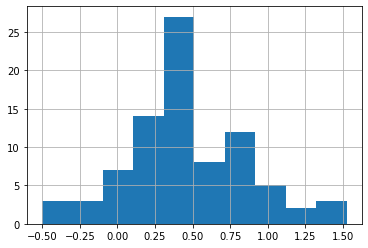

In [62]:
# Observing the distribution of our location score feature
total_location["Score"].hist()

In [63]:
#dropping unwanted columns
total_location.drop(columns=['Prix par nuit',
                   'Distance in km',
                   'Emplacement',
                    ], inplace = True)

In [65]:
total_location

,Localisation2,Score,Score1,Score2
0,abbaofa lariana,0.439635,0.214399,-0.012632
1,acquaseria,0.324181,0.107200,-0.151953
2,alserio,0.498227,0.349642,0.347869
3,argegno,1.160104,0.376790,0.911894
4,azzano,0.259111,-0.160700,-0.734922
...,...,...,...,...
79,vercana,0.321030,-0.205798,-0.363934
80,vertemate con minoprio,0.350835,0.350835,0.201671
81,vestreno,-0.467382,-0.600636,-1.234685
82,villa guarofa,0.665035,-0.105012,0.560023


In [64]:
#Merging the scores to our dataframe "data"
data = data.merge(total_location, left_on='Localisation2', right_on='Localisation2')

In [86]:
#exporting it into a csv to secure information
data.to_csv('DataCleanPropre.csv')

### 3) Creation of a "housing type" feature

The idea here is that each house has a characteristic in the listing name such as "appartement" or "hôtel"... Based on
that, we have decided to create a new feature because we think that it could matter in the price definition.

In [ ]:
clean = pd.read_csv("DataCleanPropre (3).csv") #We import the new CSV 
clean

In [ ]:
#Based on the column 'name', we can split the original column in two different columns: the type of housing we have and the host
name_new = clean["name"].str.split("⸱", n = 2, expand = True) 
name_new

#We inject the 1st column into the main dataframe
clean["Type de logement"]= name_new[0]
  
#We inject the 2nd column into the main dataframe
clean["Hébergeur"]= name_new[1]

clean

In [ ]:
len(clean["Type de logement"].value_counts()) #See how many types of housing are in the dataset 

clean["Type de logement"].value_counts() #see the different types of housing in the dataset

While looking at the different values of the housings that Airbnb offers in Como, it is possible to proceed to a classification that gathers different types of housings:
- Logement entier/Entire rental:
    - "High-end" types of housing: Loft/Villa/Châlet/Péniche/Suite (6)
    - Individual types of housing: Logement/Logement de vacances/Cottage/Gîte/Cabane/Maison de ville/Maison en terre (5)
    - Condominium types of housing: Appartement/Appartement en résidence/Tente (4)
- Rooms: 
    - Private rooms in "High-end" types of housing: Loft/Villa/Châlet/Suite (3)
    - Private rooms in individual types of housing: Logement/Logement de vacances/... (2)
    - Private rooms in condominium types of housing: Appartement/Résidence de tourisme (1)
    - Shared rooms or hostels (0)

Hence, we create a new variable "Logement codé" that contains the typology we've created, based on the assumption that the price of the listing per night will increase as we increase in class. 

As we have difficulties proceeding to str.contains with the following writing - "entire rental/room : type of housing" because of the special symbol ":", we divide the type of housing into 2 different intermediary columns "Logement entier" (entire rental) and "Chambre" (rooms). 

In [ ]:
clean.loc[clean['Type de logement'].str.contains('Logement entier'), 'Logement entier'] = clean['Type de logement']

#Sometimes, the type of housing does not contain the label "entire housing", e.g., tiny house, péniche - we need to encode them manually.

clean.loc[clean['Type de logement'].str.contains('Tente'), 'Logement entier'] = clean['Type de logement']
clean.loc[clean['Type de logement'].str.contains('Gîte à la ferme', regex=False), 'Logement entier'] = clean['Type de logement']
clean.loc[clean['Type de logement'].str.contains('Tiny house'), 'Logement entier'] = clean['Type de logement']
clean.loc[clean['Type de logement'].str.contains('Maison en terre'), 'Logement entier'] = clean['Type de logement']
clean.loc[clean['Type de logement'].str.contains('Péniche'), 'Logement entier'] = clean['Type de logement']

In [ ]:
clean.loc[clean['Type de logement'].str.contains('Chambre'), 'Chambre'] = clean['Type de logement'] 
#as the type of housing contains rooms, we include it in the variable 
clean['Chambre'].fillna(0, inplace=True) #we fill in the NaN with 0

In [ ]:
#Top range types of entire rentals


clean.loc[clean['Logement entier'].str.contains('loft') | 
          clean['Logement entier'].str.contains('villa')| 
          clean['Logement entier'].str.contains('suite')| 
          clean['Logement entier'].str.contains('Péniche')| 
          clean['Logement entier'].str.contains('chalet'), 'Logement entier codé'] = 6

#Entire rentals in individual types of housing, such as houses.


clean.loc[clean['Logement entier'].str.contains('logement') | 
          clean['Logement entier'].str.contains('logement de vacances')| 
          clean['Logement entier'].str.contains('cottage')| 
          clean['Logement entier'].str.contains('cabane')| 
          clean['Logement entier'].str.contains("maison d'hôtes")| 
          clean['Logement entier'].str.contains('maison de ville')| 
          clean['Logement entier'].str.contains('Gîte à la ferme')| 
          clean['Logement entier'].str.contains('Tiny house')| 
          clean['Logement entier'].str.contains('Maison en terre'), 'Logement entier codé'] = 5


#Entire rentals in appartment-like types of housing

clean.loc[clean['Logement entier'].str.contains('appartement') | 
          clean['Logement entier'].str.contains('appartement en résidence')| 
          clean['Logement entier'].str.contains('résidence de tourisme')| 
          clean['Logement entier'].str.contains('Tente'), 'Logement entier codé'] = 4

#The remainder, i.e., all the rooms, are considered NaN - we replace them temporarily with the value 0. 

clean['Logement entier codé'].fillna(0, inplace=True)

In [ ]:
#Room rentals in top-end types of housing


clean.loc[clean['Chambre'].str.contains('loft') | 
          clean['Chambre'].str.contains('villa')|  
          clean['Chambre'].str.contains('château')| 
          clean['Chambre'].str.contains('chalet'), 'Chambre codé'] = 3

#Room rentals in individual types of housing


clean.loc[clean['Chambre'].str.contains('logement') | 
          clean['Chambre'].str.contains('logement de vacances')| 
          clean['Chambre'].str.contains('cottage')| 
          clean['Chambre'].str.contains('cabane')| 
          clean['Chambre'].str.contains("maison d'hôtes")| 
          clean['Chambre'].str.contains('maison de ville')| 
          clean['Chambre'].str.contains('gîte')| 
          clean['Chambre'].str.contains('Tiny house')| 
          clean['Chambre'].str.contains('Maison en terre'), 'Chambre codé'] = 2


#Room rentals in appartment-like types of housing


clean.loc[clean['Chambre'].str.contains('dans boutique-hôtel') | 
          clean['Chambre'].str.contains("d'hôtes")| 
          clean['Chambre'].str.contains('appartement')| 
          clean['Chambre'].str.contains('appartement en résidence')|
          clean['Chambre'].str.contains('résidence de tourisme')|
          clean['Chambre'].str.contains('hôtel'), 'Chambre codé'] = 1

#Shared rooms or hostels or tents

clean.loc[clean['Chambre'].str.contains('partagée') | 
          clean['Chambre'].str.contains('auberge de jeunesse')|
          clean['Chambre'].str.contains('tente'), 'Chambre codé'] = 0


In [ ]:
clean["Logement codé"] = clean["Logement entier codé"] #We first integrate the "Logement entier codé" into the variable "logement codé"

#then, as the rooms have automatically the value 0 in the logement entier codé column, we replace the value 0 with the values of the Chambre codé column
clean['Logement codé'] = np.where(clean['Logement codé'] == 0, clean['Chambre codé'], clean['Logement entier codé']) 

clean['Logement codé'] 



In [ ]:
check_nan = clean['Logement codé'].isnull().values.any() #We check that we haven't forgot any NaN value
print(check_nan)

clean["Logement codé"].value_counts() #it amounts to 1,012, i.e., the length of our dataframe!



In [ ]:
clean = clean.drop(['Type de logement','Hébergeur','Logement entier','Chambre','Logement entier codé','Chambre codé'], axis=1) #we drop the columns that we don't use anymore

In [ ]:
clean['Score'] = clean['Score'].fillna(0)
clean['Score1'] = clean['Score1'].fillna(0)
clean['Score2'] = clean['Score2'].fillna(0)

In [ ]:
clean.to_csv('Dataframefinal_clean.csv')